#SE4050 - Deep Learning
## Lab Activty 04


### Student ID : IT19132310
### Name : Hettiarachchi L.S

In [26]:
#Imports
#Please include all your imports here
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [13]:
!unzip Dataset.zip /Datset

Archive:  Dataset.zip
caution: filename not matched:  /Datset


In [14]:
#Please include any pre-processing or data visualization here. 
#must include dataset loading, train test split, here. 
train_path = "/content"
test_path = "/content"


In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [16]:
#Please include your model here. use the below fomat. Model variable name should be 'model'
# model = keras.Sequential()
# model.add(........)

train = datagen.flow_from_directory(train_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)
test = datagen.flow_from_directory(test_path,target_size=(48,48),class_mode="sparse", seed=1, color_mode="grayscale", batch_size=128)


Found 455 images belonging to 9 classes.
Found 455 images belonging to 9 classes.


In [17]:
print(train.class_indices)
emotion_dict = {0: "angry", 1: "crying", 2: "embarassed", 3: "happy", 4: "pleased", 5: "sad", 6: "shock"}

{'.config': 0, 'angry': 1, 'crying': 2, 'embarrassed': 3, 'happy': 4, 'pleased': 5, 'sad': 6, 'sample_data': 7, 'shock': 8}


In [18]:
x, y = train.next()
print(x.shape, y.shape)
train.reset()

(128, 48, 48, 1) (128,)


In [19]:
# Include your model evaluation here
#must include accuracy

model = Sequential([
    Conv2D(32, (3,3), input_shape=(48,48,1),padding="same"),
    LeakyReLU(),
    Conv2D(32, (3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(64,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    Conv2D(128,(3,3),padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    Conv2D(128,(3,3), padding="same"),
    LeakyReLU(),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    
    Flatten(),
#     tf.keras.layers.GlobalAveragePooling2D(),
#     Dropout(0.4),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
#     Dense(64, activation="relu"),
    
    Dense(len(train.class_indices), activation="softmax")
])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                      

In [20]:
net = Sequential(name='DCNN')

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 1),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)
net.add(BatchNormalization(name='batchnorm_1'))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
net.add(BatchNormalization(name='batchnorm_2'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
net.add(Dropout(0.4, name='dropout_1'))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
net.add(BatchNormalization(name='batchnorm_3'))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )
)
net.add(BatchNormalization(name='batchnorm_4'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
net.add(Dropout(0.4, name='dropout_2'))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)
net.add(BatchNormalization(name='batchnorm_5'))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
net.add(BatchNormalization(name='batchnorm_6'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
net.add(Dropout(0.5, name='dropout_3'))

net.add(Flatten(name='flatten'))

net.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
net.add(BatchNormalization(name='batchnorm_7'))

net.add(Dropout(0.6, name='dropout_4'))

net.add(
    Dense(
        7,
        activation='softmax',
        name='out_layer'
    )
)

net.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

net.summary()

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 64)       256       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [23]:
model.fit(train, validation_data=test, epochs=20, callbacks=callbacks)

Epoch 1/20
4/4 [==============================] - 15s 4s/step - loss: 4.8594 - accuracy: 0.1253 - val_loss: 2.1814 - val_accuracy: 0.2088 - lr: 1.0000e-04
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 3.7735 - accuracy: 0.1582 - val_loss: 2.1840 - val_accuracy: 0.1802 - lr: 1.0000e-04
Epoch 3/20
4/4 [==============================] - 13s 4s/step - loss: 3.1810 - accuracy: 0.1890 - val_loss: 2.1846 - val_accuracy: 0.0813 - lr: 1.0000e-04
Epoch 4/20
4/4 [==============================] - 13s 3s/step - loss: 2.7457 - accuracy: 0.2132 - val_loss: 2.1968 - val_accuracy: 0.0813 - lr: 1.0000e-04
Epoch 5/20
4/4 [==============================] - 13s 3s/step - loss: 2.4715 - accuracy: 0.1868 - val_loss: 2.2185 - val_accuracy: 0.0813 - lr: 1.0000e-04
Epoch 6/20
4/4 [==============================] - 13s 3s/step - loss: 2.2516 - accuracy: 0.2132 - val_loss: 2.2531 - val_accuracy: 0.0813 - lr: 1.0000e-04
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 

In [24]:
model.save('63.h5')

In [27]:
x,y = test.next()
preds = model.predict(x)
idx = np.argmax(preds, axis = 1)
# idx.shape
print('correct prediction:', np.sum((y == idx)*1)/128)

4/4 [==============================] - 1s 166ms/step
correct prediction: 0.2265625


TypeError: ignored

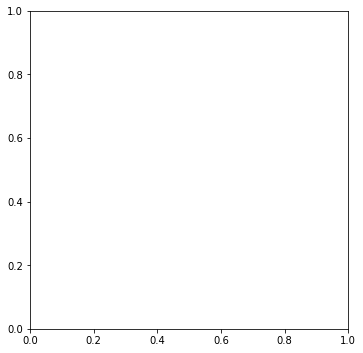

In [34]:

fig = plt.figure(1, (48, 48))

k = 0
for j in range(49):
    px = x[j]
    k += 1
    ax = plt.subplot(7, 7, k)
    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if  emotion_dict[y[j]] == emotion_dict[idx[j]]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('green')
        ax.set_title(emotion_dict[idx[j]])

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(5)
            ax.spines[axis].set_color('red')
        ax.set_title('P:'+emotion_dict[idx[j]]+" C:"+emotion_dict[y[j]])
    plt.tight_layout()

Include the details of your model here. Marks will be moslty based on the desription below and how it agree with the Model you have built. So it is okay for the accuracy to be low as long as you undertand what the model you have build does and how it behaves. :)

Remeber "More Layers" doesn't always results in "High Accuracy"

1.  Layers



>  > Layer 1 : Type of Layer, 

> > > Parameters(trainable)

> > > Hyper-Parameters

> > > dimmentions

> > > usage and reson for parameter selection

>  > Layer 2 : Type of layer, 

> > > Parameters(trainable)

> > > Hyper-Parameters

> > > dimmentions

> > > usage reson for parameter selection




